# AxiSEM3DOutput

This class holds general information about the simulation outputs and inputs. In short, it holds:
- File structure of the output
- Paths to the inparam files
- Base model as a dictionary

The class is a parent for the Station and Element classes

In [8]:
from axikernels.core.handlers import axisem3d_output

In the examples/data directory we have a simple 1D AxiSEM3D simulation. We can create an AxiSEM3DOutput instance using its path:

In [9]:
simulation = axisem3d_output.AxiSEM3DOutput('data/EXAMPLE')

Using the .outputs property we can see that this simulation did not have any "elements" outputs, but it had one "stations" output. The path to that output is given in the dictionary. The "obspyfied" key refers to wether this AxiSEM3D output has been parsed into a obspy friendly format (in this case it has not been).

In [10]:
simulation.outputs

{'elements': {},
 'stations': {'Station_grid': {'path': 'data/EXAMPLE/output/stations/Station_grid',
   'obspyfied': {'path': 'data/EXAMPLE/output/stations/Station_grid/obspyfied',
    'mseed': ['data/EXAMPLE/output/stations/Station_grid/obspyfied/Station_grid.mseed'],
    'inventory': ['data/EXAMPLE/output/stations/Station_grid/obspyfied/GSN_small_inv.xml']}}}}

Every AxiSEM3D simulation uses a base model of the Earth (or Mars, or local region, etc ...), even though the user might not be aware of this. The basemodel file (.bm file) is used when generating a mesh, that is later fed to AxiSEM3D for carying out the wave propagation. This .bm file contains information about the material structure of the wave propagation domain (vp and vs values, locations of discontinuities, etc...). The correct handling of the AxiSEM3D output has to take into account this file, which is why we require the user to place the .bm file in the input directory alongside the other inparam files. The example given here contains this file, and its contents are memorized as an attribute of the AxiSEM3DOutput instance:

In [11]:
simulation.base_model

{'type': 'axisem',
 'NAME': 'prem_iso',
 'ANELASTIC': 'T',
 'ANISOTROPIC': 'F',
 'UNITS': 'm',
 'COLUMNS': ['radius', 'rho', 'vpv', 'vsv', 'qka', 'qmu'],
 'DATA': {'radius': [6371000.0,
   6356000.0,
   6356000.0,
   6346600.0,
   6346600.0,
   6335480.0,
   6324360.0,
   6313240.0,
   6302120.0,
   6291000.0,
   6291000.0,
   6263000.0,
   6235000.0,
   6207000.0,
   6179000.0,
   6151000.0,
   6151000.0,
   6115000.0,
   6079000.0,
   6043000.0,
   6007000.0,
   5971000.0,
   5971000.0,
   5931000.0,
   5891000.0,
   5851000.0,
   5811000.0,
   5771000.0,
   5771000.0,
   5757000.0,
   5743000.0,
   5729000.0,
   5715000.0,
   5701000.0,
   5701000.0,
   5680800.0,
   5660600.0,
   5640400.0,
   5620200.0,
   5600000.0,
   5600000.0,
   5550000.0,
   5500000.0,
   5450000.0,
   5400000.0,
   5350000.0,
   5300000.0,
   5250000.0,
   5200000.0,
   5150000.0,
   5100000.0,
   5050000.0,
   5000000.0,
   4950000.0,
   4900000.0,
   4850000.0,
   4800000.0,
   4750000.0,
   4700000.0,
  

If needed, the user also has quick access to the radius of the simulation domain (assuming spherical mesh/global simulation)

In [12]:
simulation.Domain_Radius

6371000.0

For now, every aspect of this package works under the assumption that the user runs global simulations using a spherical mesh, thereofre only global basemodels are acceptable. Extending the code to local simulations is the next step. 

Besides the structure of the wavefield domain, the simulation also requires informaiton about the source. This information is found in the "inparam.source.yaml", but it is not in a format compatible with obspy. Obspy uses "catalogues" to handle sources. The AxiSEM3DOutput instance takes the "inparam.source.yaml" file and transforms it into a very basic "obspy catalogue" that is then saved in the input directory of the simulation. To access the source in the form of a obspy catalogue, use the ".catalogue" property:

/home/users/scro4564/anaconda3/envs/axikernels_test/lib/python3.12/site-packages/obspy/core/event/catalog.py:680: UserWarning: Event 'smi:local/c07297e7-0803-4dab-ae90-1ad0e217a963' does not have a magnitude and will not be plotted.
  warnings.warn(msg)


IndexError: list index out of range

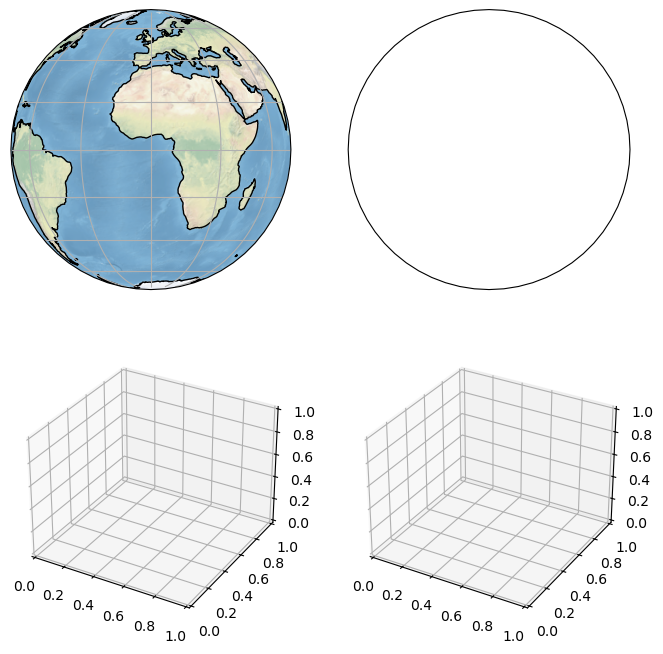

In [13]:
simulation.catalogue

Once in an Obspy format, the user can use the vast set of functionalities of Obspy to handle the information. 